From the Online Excel Sheet

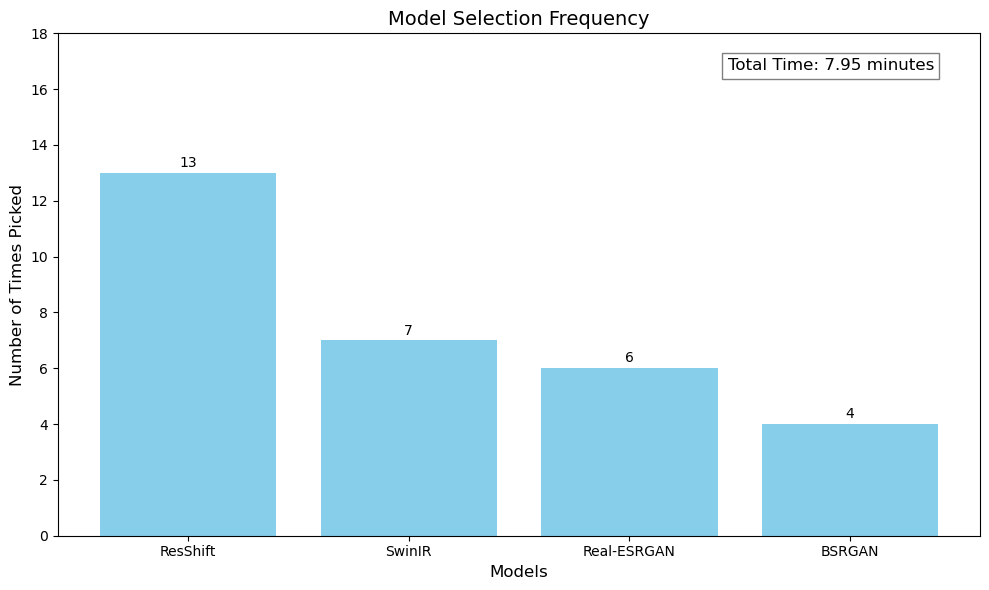

In [4]:
import matplotlib.pyplot as plt
from collections import Counter

# Data as a multi-line string
data = """
0802.png	ResShift	33.958174
0845.png	SwinIR	28.478824
0834.png	BSRGAN	28.282729
0859.png	Real-ESRGAN	38.257496
0821.png	Real-ESRGAN	10.821287
0841.png	ResShift	12.873108
0819.png	SwinIR	53.556245
0874.png	ResShift	17.147996
0824.png	Real-ESRGAN	13.971686
0837.png	SwinIR	12.559849
0861.png	ResShift	10.761678
0896.png	ResShift	13.311204
0862.png	ResShift	10.488845
0868.png	SwinIR	12.453223
0887.png	ResShift	7.909389
0873.png	BSRGAN	13.812694
0858.png	ResShift	7.077156
0831.png	SwinIR	11.567233
0884.png	SwinIR	14.336719
0899.png	BSRGAN	6.9874
0871.png	Real-ESRGAN	11.703087
0829.png	ResShift	8.847366
0838.png	BSRGAN	13.814649
0814.png	SwinIR	14.314975
0825.png	Real-ESRGAN	18.534595
0809.png	ResShift	9.064191
0816.png	ResShift	13.68246
0806.png	ResShift	11.693983
0849.png	Real-ESRGAN	8.706463
0801.png	ResShift	7.801074
"""

# Parse the data
lines = data.strip().split('\n')
models = []
total_time_seconds = 0

for line in lines:
    parts = line.split('\t')
    if len(parts) == 3:
        filename, model, time_str = parts
        models.append(model)
        try:
            time = float(time_str)
            total_time_seconds += time
        except ValueError:
            print(f"Invalid time value: {time_str} in line: {line}")

# Count the occurrences of each model
model_counts = Counter(models)

# Sort the models by count in descending order
sorted_models = sorted(model_counts.items(), key=lambda x: x[1], reverse=True)
models_sorted, counts_sorted = zip(*sorted_models)

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models_sorted, counts_sorted, color='skyblue')

# Add counts above the bars
for bar, count in zip(bars, counts_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), 
             ha='center', va='bottom', fontsize=10)

# Add total time annotation
plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of Times Picked', fontsize=12)
plt.title('Model Selection Frequency', fontsize=14)
plt.ylim(0, max(counts_sorted) + 5)

# Display total time in seconds at the end of the graph
plt.text(0.95, 0.95, f'Total Time: {total_time_seconds/60:.2f} minutes',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.cm as cm

# For better visualization
%matplotlib inline
sns.set(style="whitegrid")


In [6]:
# Load the data into pandas DataFrames
completed_df = pd.read_csv('sheets/super-res-results - completed.csv')
open_qs_df = pd.read_csv('sheets/super-res-results - open-qs.csv')
sessions_df = pd.read_csv('sheets/super-res-results - sessions.csv')

# Display the first few rows of each DataFrame
print("Completed Data:")
display(completed_df.head())

print("\nSessions Data:")
display(sessions_df.head())

print("\nOpen Qs Data:")
display(open_qs_df.head())


Completed Data:


,test_id,timestamp,name,age,image_name,selected_model,time_spent
0,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:04:22.590956+00:00,Дариха,47,0821.png,Real-ESRGAN,22.590956
1,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:04:41.402467+00:00,Дариха,47,0849.png,SwinIR,19.402467
2,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:05:12.469433+00:00,Дариха,47,0824.png,Real-ESRGAN,31.469433
3,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:05:26.149802+00:00,Дариха,47,0819.png,ResShift,14.149802
4,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:05:39.126436+00:00,Дариха,47,0838.png,Real-ESRGAN,13.126436



Sessions Data:


,test_id,name,age,start_time
0,aa422f9f-33fe-4be5-975c-29df8c8e5ea6,Muhammad Hamza Zafar,24,2024-11-23T11:47:48.227816+00:00
1,7e5fdf32-06ce-4fbb-89f1-9eea94b4b3c5,Eliza,24,2024-11-23T21:30:17.836331+00:00
2,f903b50a-5539-4cd5-ba93-4a76325cdc7f,Hu,56,2024-11-23T21:39:14.480110+00:00
3,1ffccace-fbd5-4256-a80b-9c007e8c36e9,Eliza,24,2024-11-23T21:56:10.086337+00:00
4,23fe1f39-2849-403b-b322-461557d7fd7b,hamza,12,2024-11-23T22:30:41.256534+00:00



Open Qs Data:


,test_id,timestamp,reason,feedback
0,7e5fdf32-06ce-4fbb-89f1-9eea94b4b3c5,2024-11-23T21:32:38.069797+00:00,balance between lack of artifacts and realisti...,No feedback provided
1,23fe1f39-2849-403b-b322-461557d7fd7b,2024-11-23T22:30:55.740151+00:00,No reason provided,No feedback provided
2,7b25656f-6b35-4ecc-aac5-191d4347f5af,2024-11-23T22:51:59.629530+00:00,No reason provided,No feedback provided
3,f57dcb8c-917a-49f1-af3d-b3af7da7659b,2024-11-23T22:52:15.287351+00:00,No reason provided,No feedback provided
4,be61d245-e975-423b-b22a-e3cfe9b91115,2024-11-23T22:56:03.780113+00:00,No reason provided,No feedback provided


In [7]:
# Block 2: Clean the "completed" Data

# Remove rows with missing test_id
completed_df = completed_df.dropna(subset=['test_id'])

# Separate 'Total Time' rows
total_time_df = completed_df[completed_df['image_name'] == 'Total Time'].copy()
completed_df = completed_df[completed_df['image_name'] != 'Total Time'].copy()

# Display to verify separation
display(completed_df.head())
display(total_time_df.head())

# Convert timestamp to datetime for non 'Total Time' rows
completed_df['timestamp'] = pd.to_datetime(completed_df['timestamp'], errors='coerce')

# Drop rows where timestamp conversion failed (NaT)
completed_df = completed_df.dropna(subset=['timestamp'])

# Sort the DataFrame by test_id and timestamp
completed_df = completed_df.sort_values(['test_id', 'timestamp'])

# Remove duplicates: keep first 30 unique images per test_id
def keep_first_n_unique(group, n=30):
    return group.drop_duplicates(subset=['image_name']).head(n)

completed_df = completed_df.groupby('test_id').apply(keep_first_n_unique).reset_index(drop=True)

# Optionally, you can inspect the cleaned data
display(completed_df.head())


,test_id,timestamp,name,age,image_name,selected_model,time_spent
0,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:04:22.590956+00:00,Дариха,47,0821.png,Real-ESRGAN,22.590956
1,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:04:41.402467+00:00,Дариха,47,0849.png,SwinIR,19.402467
2,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:05:12.469433+00:00,Дариха,47,0824.png,Real-ESRGAN,31.469433
3,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:05:26.149802+00:00,Дариха,47,0819.png,ResShift,14.149802
4,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:05:39.126436+00:00,Дариха,47,0838.png,Real-ESRGAN,13.126436


,test_id,timestamp,name,age,image_name,selected_model,time_spent
30,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:11:05.883935+00:00,Дариха,47,Total Time,NaN,425.883922
62,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:11:07.361904+00:00,Дариха,47,Total Time,NaN,427.361891
95,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:11:08.927974+00:00,Дариха,47,Total Time,NaN,428.927963
129,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:11:09.838239+00:00,Дариха,47,Total Time,NaN,429.838226
164,f5fb175e-ccf1-4c22-b64a-87592347dd57,2024-11-25T09:11:11.156771+00:00,Дариха,47,Total Time,NaN,431.156759


/tmp/ipykernel_1608342/3595966002.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  completed_df = completed_df.groupby('test_id').apply(keep_first_n_unique).reset_index(drop=True)


,test_id,timestamp,name,age,image_name,selected_model,time_spent
0,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:33:30.515578+00:00,Anna,23,0896.png,ResShift,40.515578
1,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:33:48.175183+00:00,Anna,23,0829.png,ResShift,18.175183
2,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:34:46.881889+00:00,Anna,23,0887.png,SwinIR,58.881889
3,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:37:09.431888+00:00,Anna,23,0806.png,SwinIR,143.431888
4,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:37:36.141497+00:00,Anna,23,0834.png,ResShift,27.141497


In [8]:
# Block 3: Merge "sessions" and "open-qs" Data

# Merge sessions data to get session details
merged_df = completed_df.merge(sessions_df, on='test_id', how='left', suffixes=('', '_session'))

# Merge open-qs data
merged_df = merged_df.merge(open_qs_df, on='test_id', how='left', suffixes=('', '_oq'))

# Fill NaN values where appropriate
merged_df['feedback'] = merged_df['feedback'].fillna('No feedback provided')

# Optionally, inspect the merged data
display(merged_df.head())


,test_id,timestamp,name,age,image_name,selected_model,time_spent,name_session,age_session,start_time,timestamp_oq,reason,feedback
0,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:33:30.515578+00:00,Anna,23,0896.png,ResShift,40.515578,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided
1,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:33:48.175183+00:00,Anna,23,0829.png,ResShift,18.175183,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided
2,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:34:46.881889+00:00,Anna,23,0887.png,SwinIR,58.881889,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided
3,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:37:09.431888+00:00,Anna,23,0806.png,SwinIR,143.431888,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided
4,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:37:36.141497+00:00,Anna,23,0834.png,ResShift,27.141497,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided


In [9]:
# Optional: Process Total Time Data

# Ensure 'time_spent' is numeric
total_time_df['time_spent'] = pd.to_numeric(total_time_df['time_spent'], errors='coerce')

# Aggregate total time per test_id
total_time_aggregated = total_time_df.groupby('test_id')['time_spent'].sum().reset_index()
total_time_aggregated.rename(columns={'time_spent': 'total_time_spent'}, inplace=True)

# Merge total_time_aggregated with merged_df
merged_df = merged_df.merge(total_time_aggregated, on='test_id', how='left')

# Optionally, inspect the merged data with total_time
display(merged_df.head())


,test_id,timestamp,name,age,image_name,selected_model,time_spent,name_session,age_session,start_time,timestamp_oq,reason,feedback,total_time_spent
0,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:33:30.515578+00:00,Anna,23,0896.png,ResShift,40.515578,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided,2246.237215
1,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:33:48.175183+00:00,Anna,23,0829.png,ResShift,18.175183,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided,2246.237215
2,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:34:46.881889+00:00,Anna,23,0887.png,SwinIR,58.881889,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided,2246.237215
3,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:37:09.431888+00:00,Anna,23,0806.png,SwinIR,143.431888,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided,2246.237215
4,066114b4-e63a-4f2d-aba9-9476206aa0c8,2024-11-25 11:37:36.141497+00:00,Anna,23,0834.png,ResShift,27.141497,Anna,23.0,2024-11-25T11:32:50.889009+00:00,2024-11-25T12:11:02.043323+00:00,It was cool! Good luck with the project <3,No feedback provided,2246.237215


In [10]:
def add_count_labels(ax, spacing=5):
    """
    Adds count labels on top of each bar in the given axes.

    Parameters:
    - ax: Matplotlib Axes object.
    - spacing: Space in points between the bar and the label.
    """
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height) and height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        xytext=(0, spacing), 
                        textcoords='offset points')


/tmp/ipykernel_1608342/2209641537.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_counts.index, y=model_counts.values, palette='viridis')


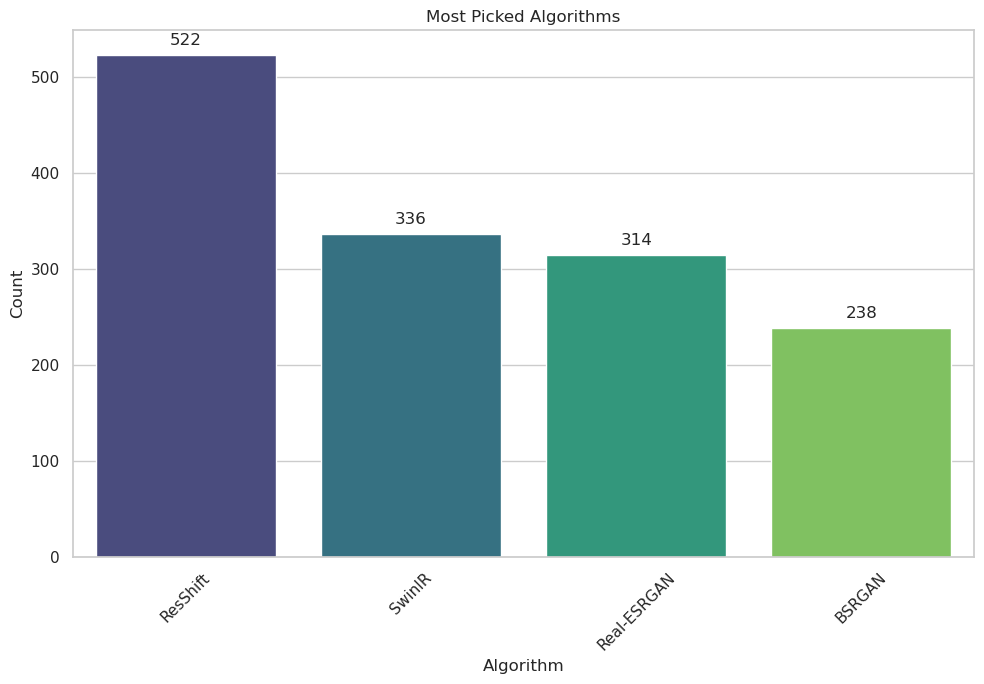

In [11]:
# Block 4: Most Picked Algorithm with Count Labels

# Count the occurrences of each selected_model
model_counts = completed_df['selected_model'].value_counts()

# Plotting
plt.figure(figsize=(10,7))
ax = sns.barplot(x=model_counts.index, y=model_counts.values, palette='viridis')
plt.title('Most Picked Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels
add_count_labels(ax)

plt.tight_layout()
plt.show()


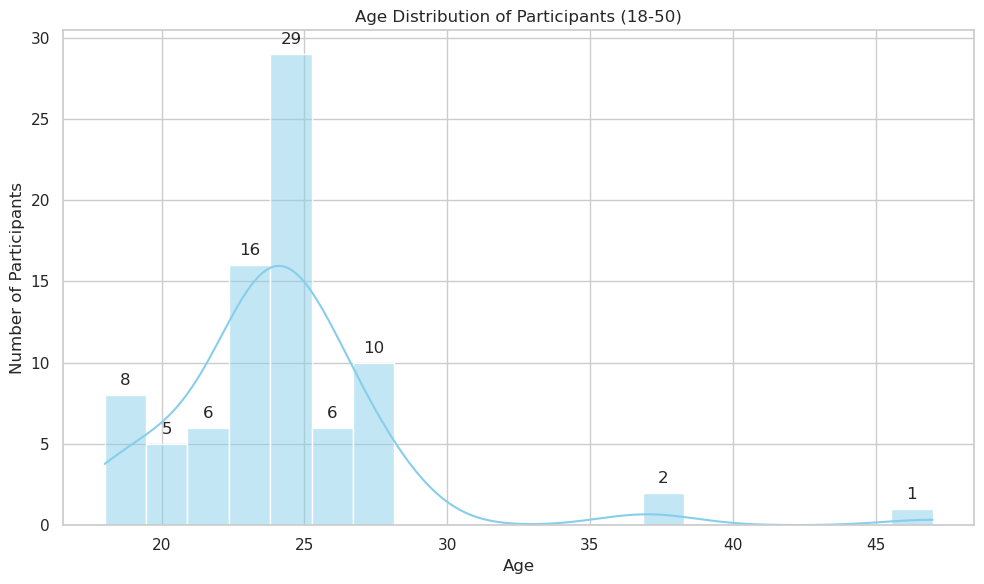

In [12]:
# Block 5: Age Distribution (Filtered to 18-50)

# Define age range
min_age = 18
max_age = 50

# Filter sessions_df to include only ages between 18 and 50
filtered_sessions_df = sessions_df[(sessions_df['age'] >= min_age) & (sessions_df['age'] <= max_age)].copy()

# Also, update merged_df to reflect the age filtering
merged_df = merged_df[merged_df['test_id'].isin(filtered_sessions_df['test_id'])].copy()

# Plot age distribution
plt.figure(figsize=(10,6))
ax = sns.histplot(filtered_sessions_df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Participants (18-50)')
plt.xlabel('Age')
plt.ylabel('Number of Participants')

# Add count labels to the histogram
for patch in ax.patches:
    height = patch.get_height()
    if not np.isnan(height) and height > 0:
        ax.annotate(f'{int(height)}',
                    (patch.get_x() + patch.get_width() / 2., height),
                    ha='center', va='bottom',
                    xytext=(0, 5), 
                    textcoords='offset points')

plt.tight_layout()
plt.show()


Using 'total_time_spent' from merged_df.
Columns in total_time: ['test_id', 'time_spent']
Total entries before filtering: 44
Total entries after filtering: 43


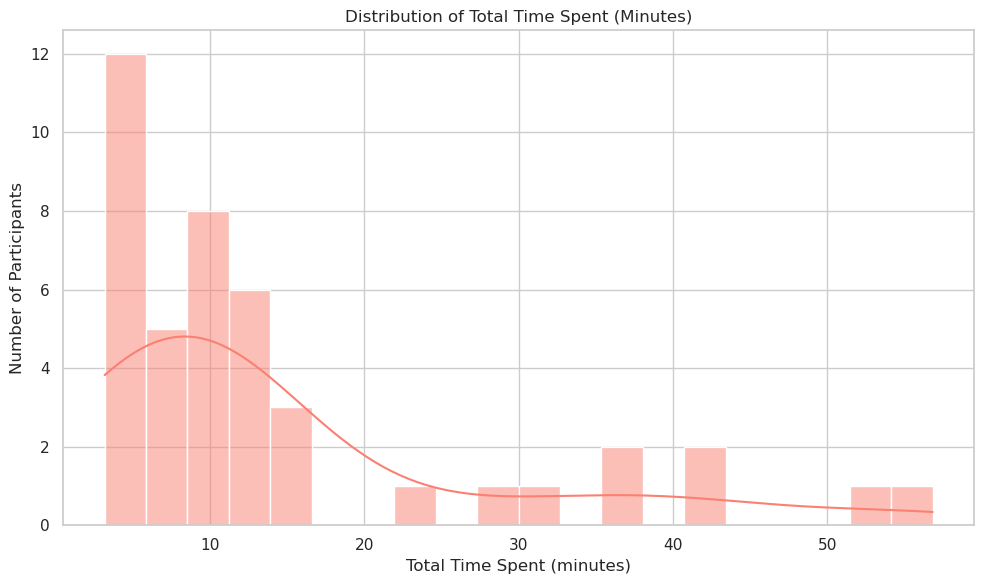

In [13]:
# Function to add count labels to histogram bars
def add_count_labels_hist(ax):
    for patch in ax.patches:
        height = patch.get_height()
        if not pd.isna(height) and height > 0:
            ax.annotate(f'{int(height)}',
                        (patch.get_x() + patch.get_width() / 2., height),
                        ha='center', va='bottom',
                        xytext=(0, 5), 
                        textcoords='offset points')

# Check if 'total_time_spent' exists in merged_df
if 'total_time_spent' in merged_df.columns:
    print("Using 'total_time_spent' from merged_df.")
    total_time = merged_df[['test_id', 'total_time_spent']].drop_duplicates()
    
    # Rename for consistency
    total_time.rename(columns={'total_time_spent': 'time_spent'}, inplace=True)
else:
    print("'total_time_spent' not found in merged_df. Calculating from completed_df.")
    # Ensure 'time_spent' exists in completed_df
    if 'time_spent' not in completed_df.columns:
        print("Error: 'time_spent' column not found in completed_df.")
        print("Available columns in completed_df:", completed_df.columns.tolist())
    else:
        total_time = completed_df.groupby('test_id')['time_spent'].sum().reset_index()

# Verify columns in total_time
print("Columns in total_time:", total_time.columns.tolist())

# Proceed only if 'time_spent' exists in total_time
if 'time_spent' in total_time.columns:
    # Convert 'time_spent' from seconds to minutes
    total_time['total_time_minutes'] = total_time['time_spent'] / 60  # Convert to minutes
    
    # Filter out entries with total_time_minutes > 2000
    filtered_total_time = total_time[total_time['total_time_minutes'] <= 60].copy()
    
    print(f"Total entries before filtering: {total_time.shape[0]}")
    print(f"Total entries after filtering: {filtered_total_time.shape[0]}")
    
    # Plotting the distribution
    plt.figure(figsize=(10,6))
    ax = sns.histplot(filtered_total_time['total_time_minutes'], bins=20, kde=True, color='salmon')
    plt.title('Distribution of Total Time Spent (Minutes)')
    plt.xlabel('Total Time Spent (minutes)')
    plt.ylabel('Number of Participants')
    

    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot 'total_time_minutes' because 'time_spent' is missing in total_time.")

Total entries before filtering: 1410
Total entries after filtering (≤ 60 mins): 1394


/tmp/ipykernel_1608342/2908770224.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


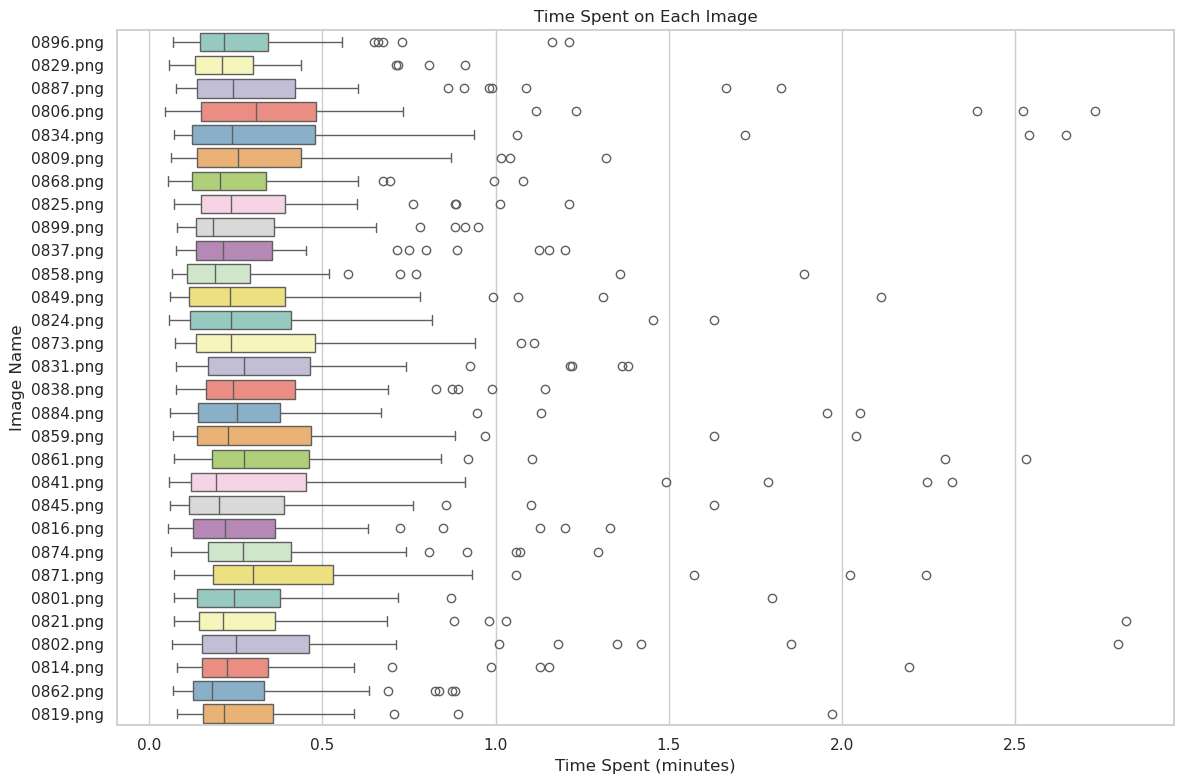

In [14]:
# Block 7: Time Spent on Images (Converted to Minutes, Filtered ≤ 60 Minutes, and Horizontal Boxplot)

import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'time_spent' is numeric
completed_df['time_spent'] = pd.to_numeric(completed_df['time_spent'], errors='coerce')

# Create a new column 'time_spent_minutes' by converting seconds to minutes
completed_df['time_spent_minutes'] = completed_df['time_spent'] / 60

# Filter the DataFrame to include only entries with time_spent_minutes <= 60
filtered_completed_df = completed_df[completed_df['time_spent_minutes'] <= 60].copy()

# Optionally, remove any remaining duplicates or outliers if necessary
# For example, removing statistical outliers based on the 99th percentile
percentile_99 = filtered_completed_df['time_spent_minutes'].quantile(0.99)
filtered_completed_df = filtered_completed_df[filtered_completed_df['time_spent_minutes'] <= percentile_99].copy()

print(f"Total entries before filtering: {completed_df.shape[0]}")
print(f"Total entries after filtering (≤ 60 mins): {filtered_completed_df.shape[0]}")

# Plotting the horizontal boxplot
plt.figure(figsize=(12,8))
sns.boxplot(
    y='image_name', 
    x='time_spent_minutes', 
    data=filtered_completed_df, 
    palette='Set3'
)
plt.title('Time Spent on Each Image')
plt.xlabel('Time Spent (minutes)')
plt.ylabel('Image Name')
plt.tight_layout()
plt.show()


Total participants before age filtering: 1350
Total participants after age filtering (age < 30): 1290


/tmp/ipykernel_1608342/3094954951.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


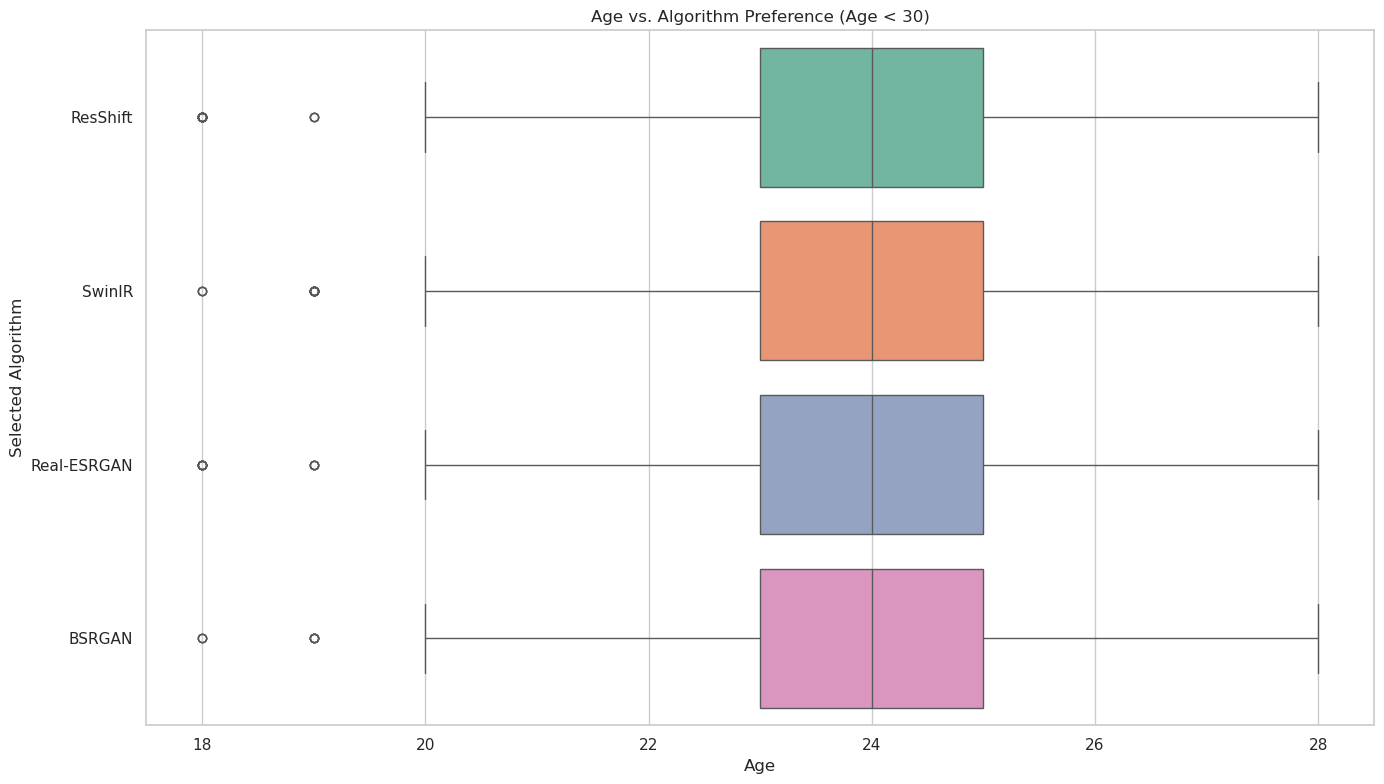

/tmp/ipykernel_1608342/3094954951.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(
/home/hamzaz/miniconda3/envs/apw/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hamzaz/miniconda3/envs/apw/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 43.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hamzaz/miniconda3/envs/apw/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 42.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hamzaz/miniconda3/envs/a

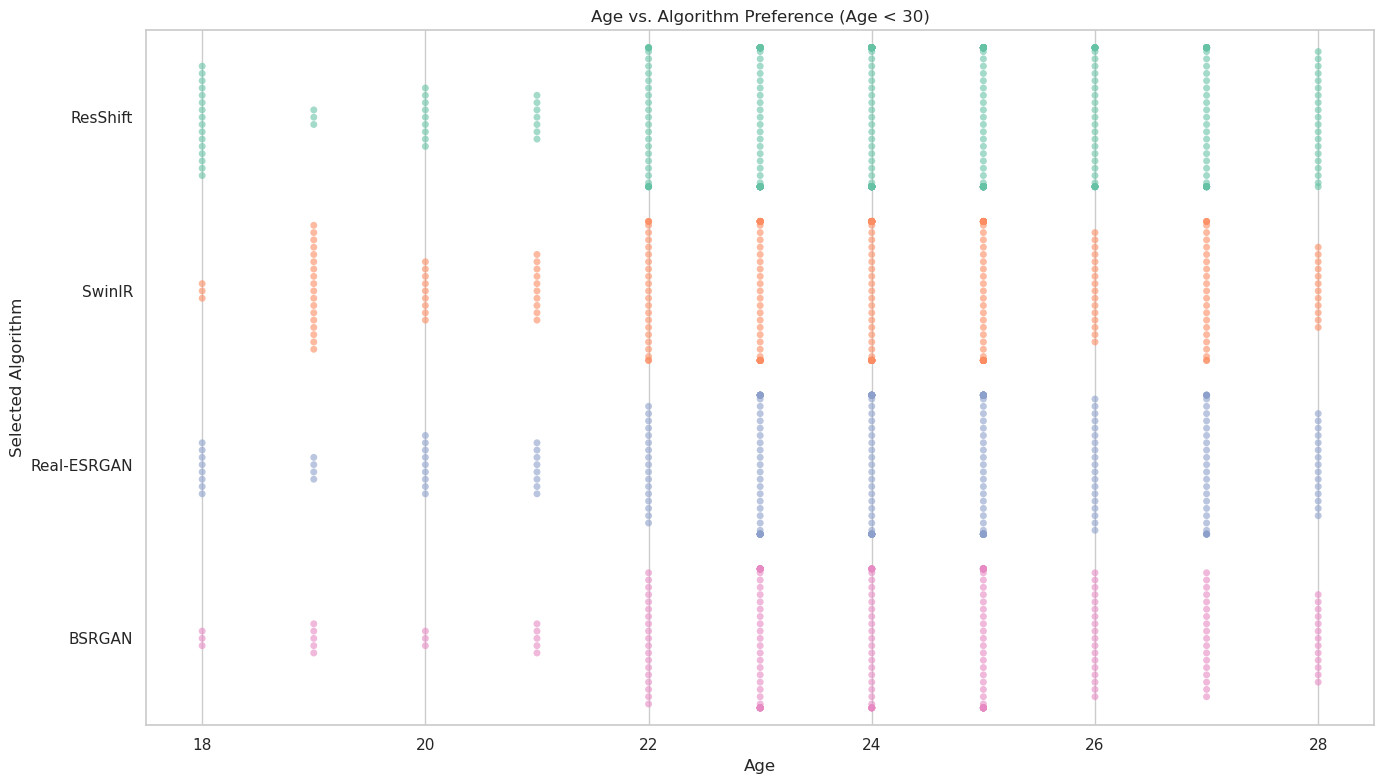

In [15]:
# Block 8: Preferences and Age Relation (Filtered Age < 30 and Horizontal Plots)

import matplotlib.pyplot as plt
import seaborn as sns

# Define the maximum age
max_age = 30

# Filter merged_df to include only participants with age < 30
filtered_age_df = merged_df[merged_df['age'] < max_age].copy()

print(f"Total participants before age filtering: {merged_df.shape[0]}")
print(f"Total participants after age filtering (age < {max_age}): {filtered_age_df.shape[0]}")

# Plotting the horizontal boxplot
plt.figure(figsize=(14,8))
ax = sns.boxplot(
    y='selected_model', 
    x='age', 
    data=filtered_age_df, 
    palette='Set2'
)
plt.title(f'Age vs. Algorithm Preference (Age < {max_age})')
plt.xlabel('Age')
plt.ylabel('Selected Algorithm')

plt.tight_layout()
plt.show()

# Alternatively, using a horizontal swarm plot for better visibility
plt.figure(figsize=(14,8))
sns.swarmplot(
    y='selected_model', 
    x='age', 
    data=filtered_age_df, 
    palette='Set2', 
    alpha=0.6
)
plt.title(f'Age vs. Algorithm Preference (Age < {max_age})')
plt.xlabel('Age')
plt.ylabel('Selected Algorithm')
plt.tight_layout()
plt.show()


/tmp/ipykernel_1608342/91430672.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Session Type', y='Count', data=session_data, palette='pastel')


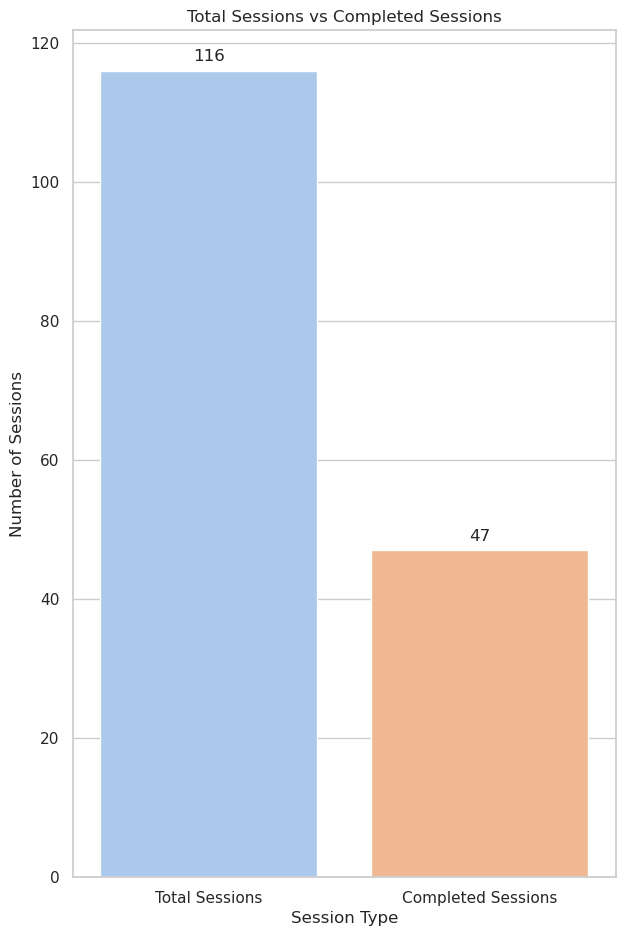

In [16]:
# Block 9: Total Sessions vs Completed Ones

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming add_count_labels(ax) is already defined in your notebook

total_sessions = sessions_df['test_id'].nunique()
completed_sessions = completed_df['test_id'].nunique()

session_data = pd.DataFrame({
    'Session Type': ['Total Sessions', 'Completed Sessions'],
    'Count': [total_sessions, completed_sessions]
})

plt.figure(figsize=(7,11))
ax = sns.barplot(x='Session Type', y='Count', data=session_data, palette='pastel')

# Add count labels
add_count_labels(ax)

plt.title('Total Sessions vs Completed Sessions')
plt.xlabel('Session Type')
plt.ylabel('Number of Sessions')
plt.show()


In [17]:
open_qs_df

,test_id,timestamp,reason,feedback
0,7e5fdf32-06ce-4fbb-89f1-9eea94b4b3c5,2024-11-23T21:32:38.069797+00:00,balance between lack of artifacts and realisti...,No feedback provided
1,23fe1f39-2849-403b-b322-461557d7fd7b,2024-11-23T22:30:55.740151+00:00,No reason provided,No feedback provided
2,7b25656f-6b35-4ecc-aac5-191d4347f5af,2024-11-23T22:51:59.629530+00:00,No reason provided,No feedback provided
3,f57dcb8c-917a-49f1-af3d-b3af7da7659b,2024-11-23T22:52:15.287351+00:00,No reason provided,No feedback provided
4,be61d245-e975-423b-b22a-e3cfe9b91115,2024-11-23T22:56:03.780113+00:00,No reason provided,No feedback provided
5,da6e3d2f-3e6c-4685-8b86-17f355eb234e,2024-11-23T22:59:42.128829+00:00,No reason provided,No feedback provided
6,e083ffc3-0d41-47a2-8714-fff0b34b62a4,2024-11-23T23:01:03.686218+00:00,ok,ok
7,b456b6d7-203b-4e76-a467-fa848a825509,2024-11-23T23:03:12.479722+00:00,okok,okok
8,044afe1f-b7d4-4292-b8c8-a40bb75bc751,2024-11-23T23:46:32.400026+00:00,No reason provided,No feedback provided
9,e54bf6aa-8e73-44c6-965d-ffe59fdd1723,2024-11-24T23:00:33.095695+00:00,No reason provided,No feedback provided


[nltk_data] Downloading package stopwords to /home/hamzaz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/hamzaz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/hamzaz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hamzaz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Total feedback entries before filtering: 57
Total feedback entries after filtering: 16

Sample of filtered feedback entries:
6                                                    ok
7                                                  okok
10                                                  yed
14    Need to focus on the background as well e.g li...
16    You should enhance the quality of images that ...
17                                      Keep up sensei!
22                                                 No 👀
24                  will the results be shared with me 
30                improve mobile adaptation of the site
31    The images look AI generated. Idk if this is t...
Name: feedback, dtype: object

Sample of cleaned feedback entries:
6                                                    ok
7                                                  okok
10                                                  yed
14    need focus background well eg like main object...
16                   enh

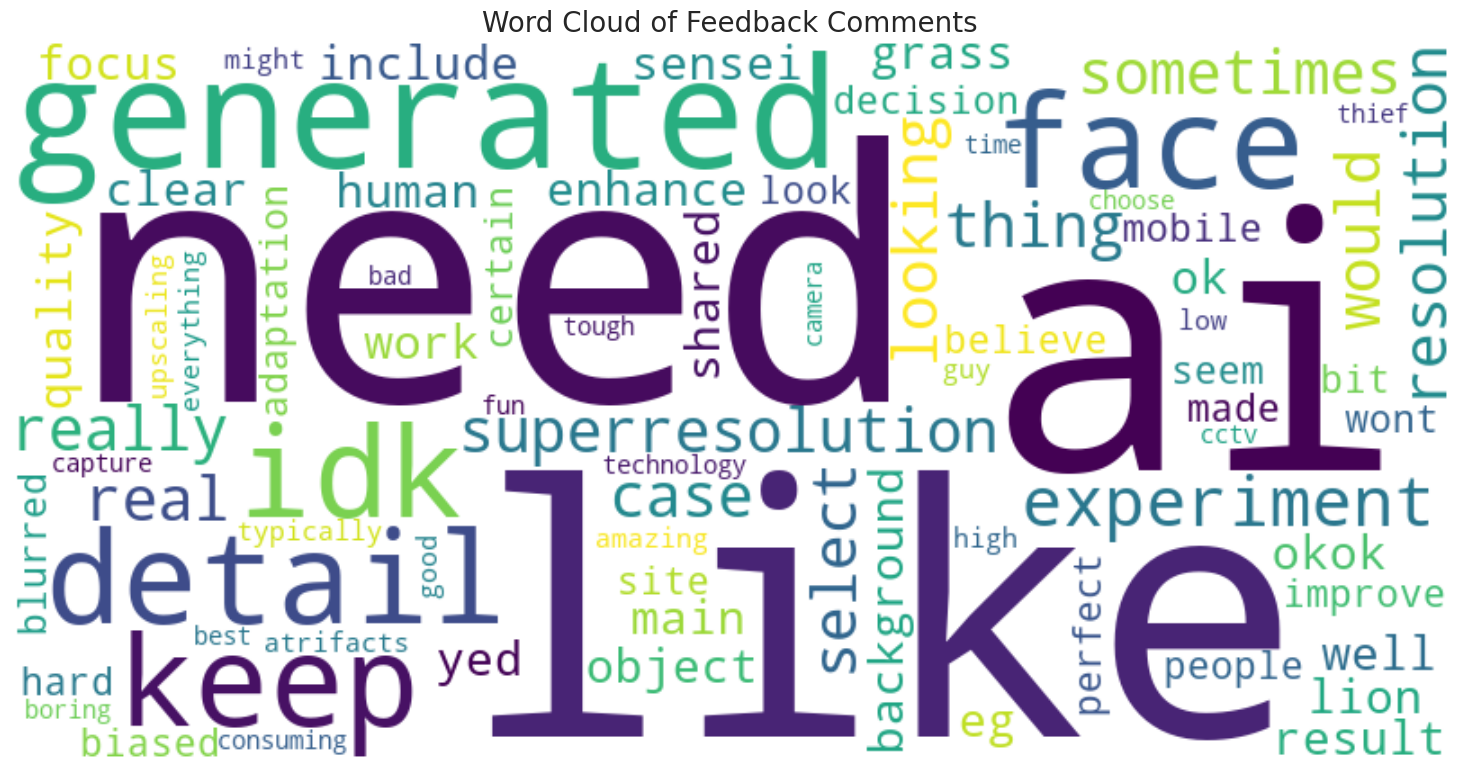

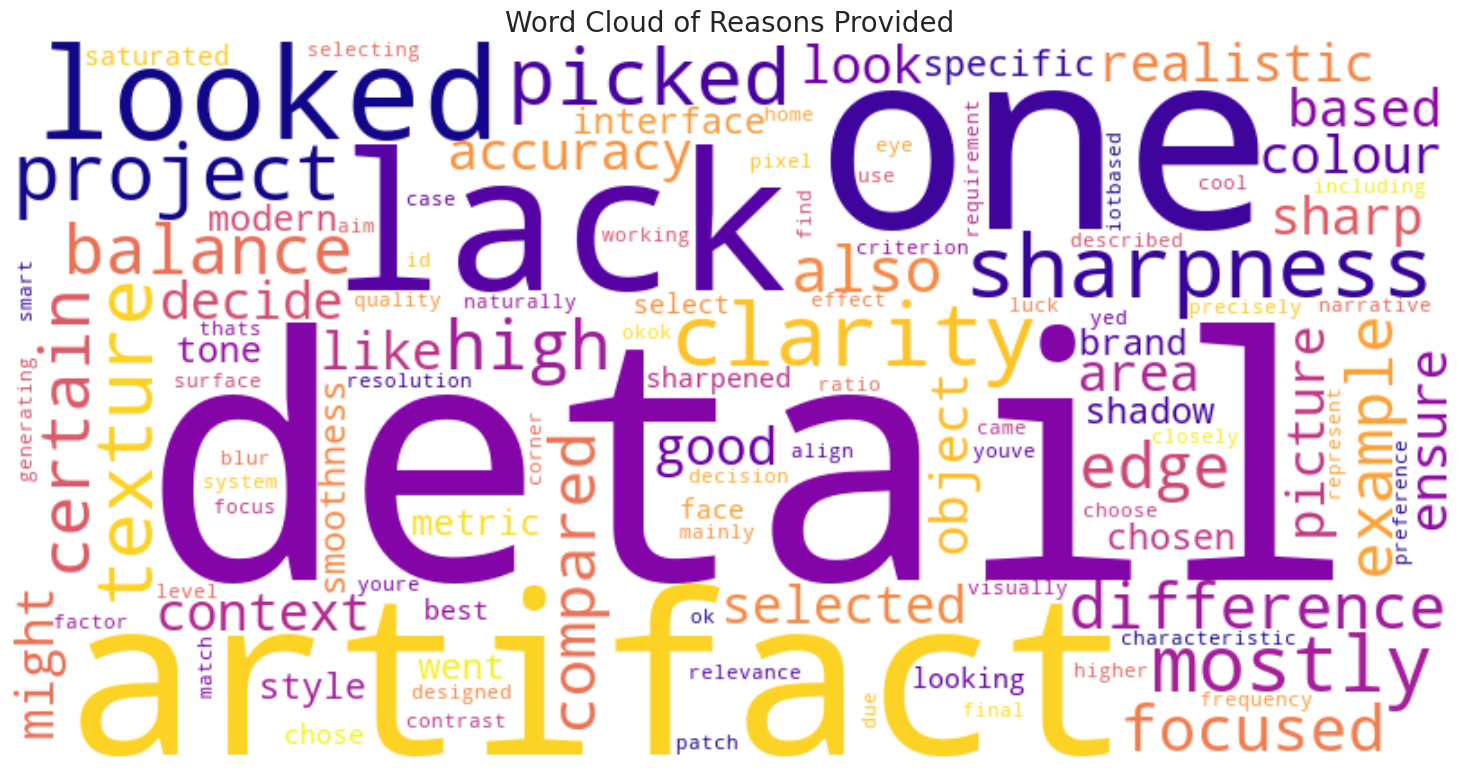

In [18]:
# Block 10: Visualizing Open Qs Comments and Reasons - Comprehensive Word Cloud Generation

import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk

# Download necessary NLTK data files (if not already downloaded)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')  # For word_tokenize
nltk.download('averaged_perceptron_tagger')  # For POS tagging

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define additional custom stopwords if necessary
custom_stopwords = set([
    'color',      # Example: add words to exclude from the word cloud
    'colors',
    'image',
    'images',
    # Add more custom stopwords as needed
])

# Combine default and custom stopwords
all_stopwords = set(stopwords.words('english')).union(custom_stopwords)

def preprocess_text(text):
    """
    Preprocesses the input text by lowercasing, removing punctuation,
    removing stopwords, and lemmatizing.

    Parameters:
    - text (str): The input text.

    Returns:
    - str: The cleaned and preprocessed text.
    """
    if not isinstance(text, str):
        return ''

    # Lowercase the text
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove numbers (optional)
    text = ''.join([char for char in text if not char.isdigit()])
    
    # Tokenize the text
    tokens = text.split()
    
    # Remove stopwords and lemmatize
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in all_stopwords]
    
    # Rejoin tokens into a single string
    return ' '.join(cleaned_tokens)

# Function to generate and plot word cloud
def generate_wordcloud(text, title, max_words=200, colormap='viridis'):
    """
    Generates and plots a word cloud from the provided text.

    Parameters:
    - text (str): The preprocessed text.
    - title (str): The title of the word cloud plot.
    - max_words (int): The maximum number of words to include in the word cloud.
    - colormap (str): The color map to use for the word cloud.
    """
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=colormap,
        stopwords=all_stopwords,
        collocations=False,
        max_words=max_words,
        min_font_size=10
    ).generate(text)
    
    plt.figure(figsize=(15,7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout(pad=0)
    plt.show()

# =============================
# Processing 'feedback' Column
# =============================

# Block 10A: Verify and Filter 'feedback' Entries
# Filter out feedback entries that are exactly "No feedback provided" (case-insensitive)
filtered_feedback_df = open_qs_df[
    open_qs_df['feedback'].str.strip().str.lower() != 'no feedback provided'
].copy()

# Display the number of feedback entries before and after filtering
print(f"Total feedback entries before filtering: {open_qs_df.shape[0]}")
print(f"Total feedback entries after filtering: {filtered_feedback_df.shape[0]}")

# Inspect a few feedback entries to ensure correctness
print("\nSample of filtered feedback entries:")
print(filtered_feedback_df['feedback'].head(10))

# Block 10B: Enhanced Text Preprocessing for 'feedback'
# Apply preprocessing to the 'feedback' text
filtered_feedback_df['cleaned_feedback'] = filtered_feedback_df['feedback'].apply(preprocess_text)

# Combine all cleaned feedback into one string
feedback_text = ' '.join(filtered_feedback_df['cleaned_feedback'].dropna().astype(str))

# Display a sample of the cleaned feedback
print("\nSample of cleaned feedback entries:")
print(filtered_feedback_df['cleaned_feedback'].head(10))

# Block 10C: Inspect Word Frequencies for 'feedback'
# Split the feedback_text into words
feedback_words = feedback_text.split()

# Count word frequencies
feedback_word_counts = Counter(feedback_words)

# Display the top 20 most common words in feedback
print("\nTop 20 most common words in feedback:")
for word, count in feedback_word_counts.most_common(20):
    print(f"{word}: {count}")

# =============================
# Processing 'reason' Column
# =============================

# Block 10D: Verify and Filter 'reason' Entries
# Assuming "No reason provided" is the default, adjust accordingly
filtered_reason_df = open_qs_df[
    open_qs_df['reason'].str.strip().str.lower() != 'no reason provided'
].copy()

# Display the number of reason entries before and after filtering
print(f"\nTotal reason entries before filtering: {open_qs_df.shape[0]}")
print(f"Total reason entries after filtering: {filtered_reason_df.shape[0]}")

# Inspect a few reason entries to ensure correctness
print("\nSample of filtered reason entries:")
print(filtered_reason_df['reason'].head(10))

# Block 10E: Enhanced Text Preprocessing for 'reason'
# Apply preprocessing to the 'reason' text
filtered_reason_df['cleaned_reason'] = filtered_reason_df['reason'].apply(preprocess_text)

# Combine all cleaned reasons into one string
reason_text = ' '.join(filtered_reason_df['cleaned_reason'].dropna().astype(str))

# Display a sample of the cleaned reason
print("\nSample of cleaned reason entries:")
print(filtered_reason_df['cleaned_reason'].head(10))

# Block 10F: Inspect Word Frequencies for 'reason'
# Split the reason_text into words
reason_words = reason_text.split()

# Count word frequencies
reason_word_counts = Counter(reason_words)

# Display the top 20 most common words in reason
print("\nTop 20 most common words in reason:")
for word, count in reason_word_counts.most_common(20):
    print(f"{word}: {count}")

# =============================
# Generating Word Clouds
# =============================

# Block 10G: Generate Word Cloud for 'feedback'
generate_wordcloud(
    text=feedback_text,
    title='Word Cloud of Feedback Comments',
    max_words=200,
    colormap='viridis'
)

# Block 10H: Generate Word Cloud for 'reason'
generate_wordcloud(
    text=reason_text,
    title='Word Cloud of Reasons Provided',
    max_words=200,
    colormap='plasma'  # Different color map for distinction
)


In [19]:
# Block 11: Save Cleaned Data (Optional)

merged_df.to_csv('cleaned_data.csv', index=False)


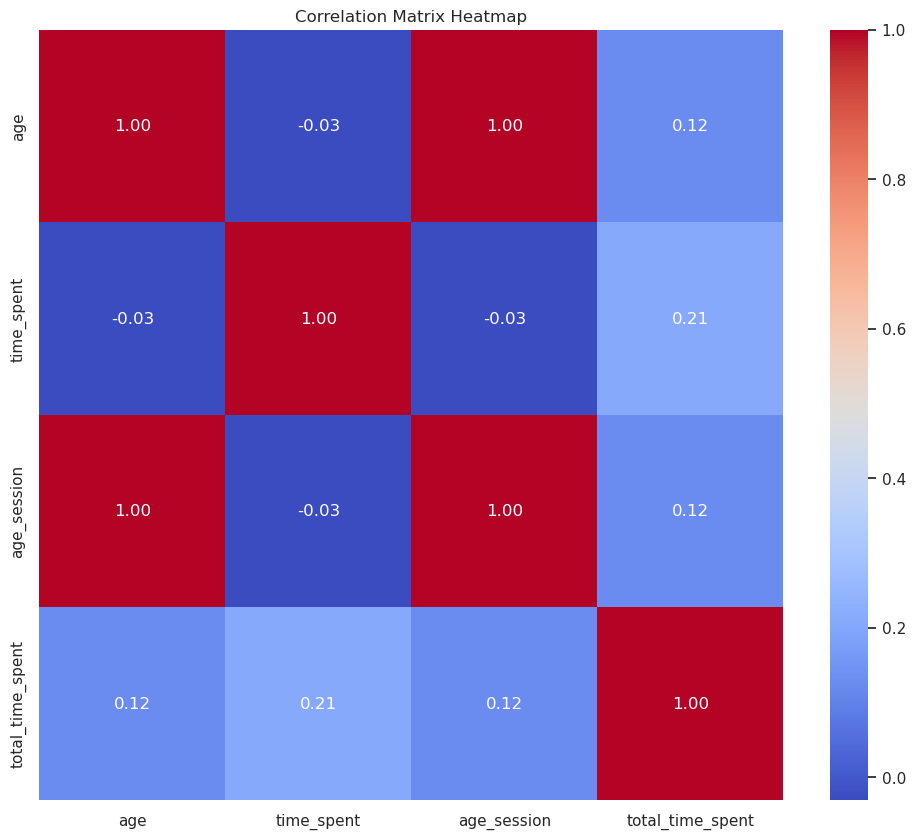

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
corr_matrix = merged_df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


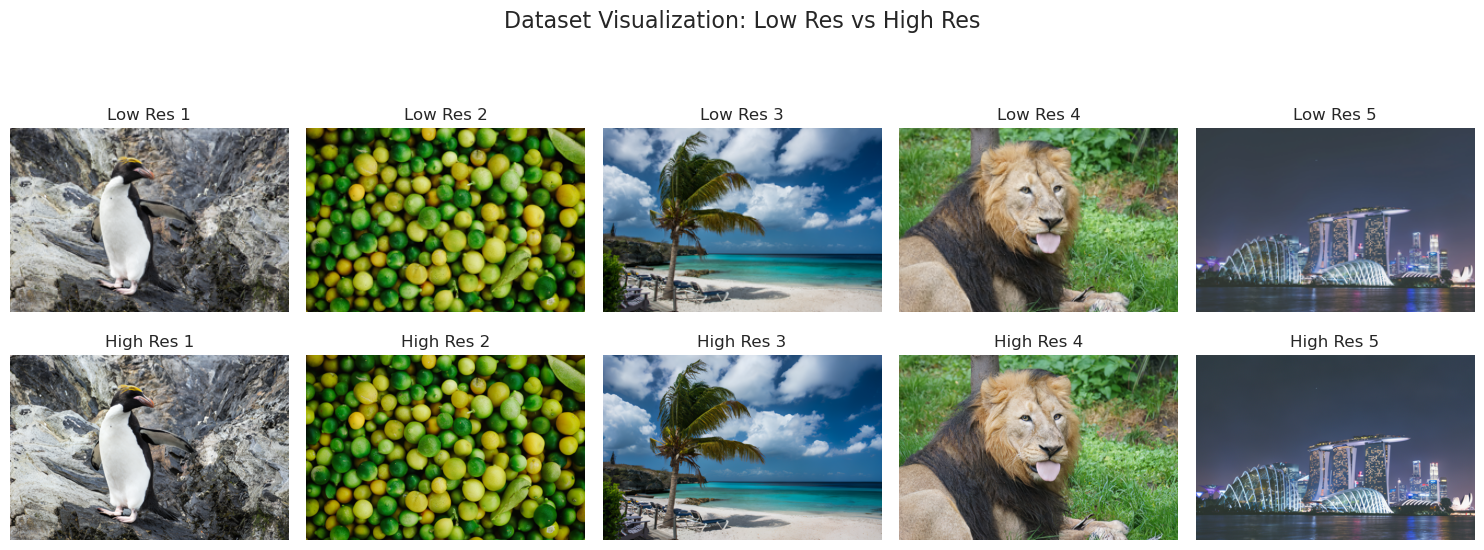

In [21]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Paths to your datasets
low_res_path = "flask/static/images/selected_256"
high_res_path = "flask/static/images/selected_256_ResShift"

# Get sorted lists of images
low_res_images = sorted(os.listdir(low_res_path))
high_res_images = sorted(os.listdir(high_res_path))

# Select a small sample for visualization (adjust number as needed)
num_images = min(5, len(low_res_images), len(high_res_images))  # Display up to 5 pairs
low_res_images = low_res_images[:num_images]
high_res_images = high_res_images[:num_images]

# Plot images side-by-side
fig, axs = plt.subplots(2, num_images, figsize=(15, 6))  # Adjust figsize for landscape

for i, (low_res, high_res) in enumerate(zip(low_res_images, high_res_images)):
    # Load low-resolution image
    low_res_img = Image.open(os.path.join(low_res_path, low_res))
    axs[0, i].imshow(low_res_img)
    axs[0, i].axis("off")
    axs[0, i].set_title(f"Low Res {i+1}")

    # Load high-resolution image
    high_res_img = Image.open(os.path.join(high_res_path, high_res))
    axs[1, i].imshow(high_res_img)
    axs[1, i].axis("off")
    axs[1, i].set_title(f"High Res {i+1}")

# Add global titles for clarity
fig.suptitle("Dataset Visualization: Low Res vs High Res", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust spacing for the title

# Save the figure
plt.savefig("dataset_visualization.png")
plt.show()


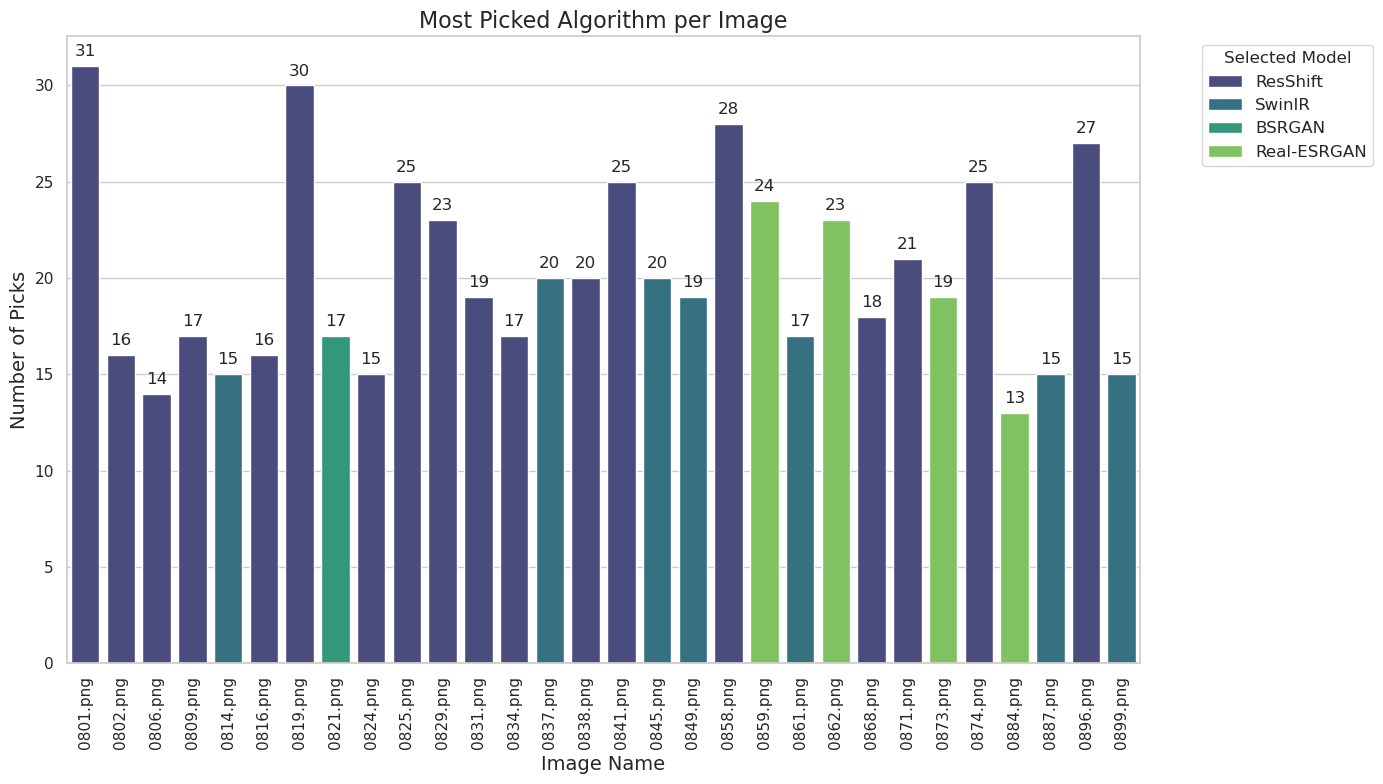

In [ ]:
# Block 14: Most Picked Algorithm per Image and Example Visualizations

import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import seaborn as sns

# Define the add_count_labels function
def add_count_labels(ax):
    """
    Adds count labels on top of each bar in the given Axes.
    """
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height) and height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        xytext=(0, 5), 
                        textcoords='offset points')

# Assuming completed_df is already defined and cleaned
# Exclude 'Total Time' entries
df = completed_df[completed_df['image_name'] != 'Total Time']

# Group by image_name and selected_model, count
model_picks = df.groupby(['image_name', 'selected_model']).size().reset_index(name='count')

# For each image, find the model with the highest count
most_picked = model_picks.loc[model_picks.groupby('image_name')['count'].idxmax()].reset_index(drop=True)

# Plotting the most picked model per image
plt.figure(figsize=(14,8))
ax = sns.barplot(x='image_name', y='count', hue='selected_model', data=most_picked, palette='viridis')
plt.title('Most Picked Algorithm per Image', fontsize=16)
plt.xlabel('Image Name', fontsize=14)
plt.ylabel('Number of Picks', fontsize=14)
plt.xticks(rotation=90)
add_count_labels(ax)
plt.legend(title='Selected Model', fontsize=12, title_fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:

# Function to display one example image from each selected model
def display_model_examples(most_picked_df, base_dir="flask/static/images/"):
    """
    Displays one example image for each selected model where it was most picked.
    
    Parameters:
    - most_picked_df: DataFrame containing image_name and selected_model.
    - base_dir: Base directory where model folders are located.
    """
    models = most_picked_df['selected_model'].unique()
    plt.figure(figsize=(20,5))
    
    for idx, model in enumerate(models, 1):
        img_row = most_picked_df[most_picked_df['selected_model'] == model].iloc[0]
        image_name = img_row['image_name']
        img_path = os.path.join(base_dir, model, image_name)
        
        if not os.path.exists(img_path):
            print(f"Image path '{img_path}' does not exist.")
            continue
        
        img = Image.open(img_path).convert('RGB')
        
        plt.subplot(1, len(models), idx)
        plt.imshow(img)
        plt.title(f"{model}\n({image_name})", fontsize=12)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display example images
display_model_examples(most_picked)


Image path 'flask/static/images/ResShift/0801.png' does not exist.
Image path 'flask/static/images/SwinIR/0814.png' does not exist.
Image path 'flask/static/images/BSRGAN/0821.png' does not exist.
Image path 'flask/static/images/Real-ESRGAN/0859.png' does not exist.


<Figure size 2000x500 with 0 Axes>